In [2]:
import seaborn; seaborn.set()
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pylab
import math

In [27]:
def display_graph(G, partition_list=None, pos=None):
    if pos is None:
        pos = nx.spring_layout(G)
    if partition_list is None:
        nx.draw_networkx_nodes(G, pos, G.nodes(), node_size=240, node_color='0.5')
    else:
        count = 0
        parts = len(partition_list)
        for p in partition_list:
            count += 1
            nx.draw_networkx_nodes(G, pos, p, node_size=240, node_color=str(count / float(parts)))
    plt.axis('off')
    frame = plt.gca()
    frame.set_aspect('equal', adjustable='box')
    # frame.axes.xaxis.set_ticklabels([])
    # frame.axes.yaxis.set_ticklabels([])
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    labels = {i: '${}$'.format(i) for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels)
    plt.show()

In [36]:
G = nx.Graph()
G.add_nodes_from(xrange(1,11))
G.nodes()
G.add_edges_from([[1,2], [1,10], [2,10], [2,3], [2,9], [3,9], [3,10], [9,10]])
G.edges()
G.add_edges_from([[4,5], [5,8], [8,4], [5,6], [6,7], [7,8]])
G.add_edge(3,4)
parts = 2

In [40]:
pos = {
    1:(-math.sqrt(3), 1),
    2:(0,2),
    3:(2,2),
    4:(4,2),
    5:(6,2),
    6:(6+math.sqrt(3),1),
    7:(6,0),
    8:(4,0),
    9:(2,0),
    10:(0,0)
}

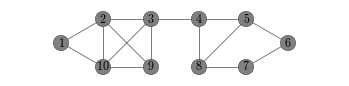

In [6]:
display_graph(G, None, pos)

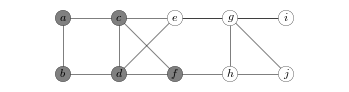

In [29]:
import community
def get_cd_partition(G):
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    cd_partition_dict = {}
    for k in partition:
        v = partition[k]
        if v not in cd_partition_dict:
            cd_partition_dict[v] = [k]
        else:
            cd_partition_dict[v].append(k)
    cd_partition_list = [cd_partition_dict[k] for k in cd_partition_dict]
    return cd_partition_list
cd_partition_list = get_cd_partition(G)
display_graph(G, cd_partition_list, pos)

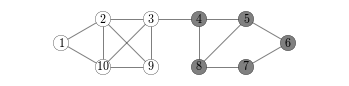

In [41]:
import nxmetis
def get_metis_partition(G, parts):
    edgecuts, partition_list =  nxmetis.partition(G, parts)
    return partition_list
partition_list = get_metis_partition(G, parts)    
display_graph(G, partition_list, pos)

[['c', 'i', 'b', 'e', 'j'], ['d', 'f', 'g', 'a', 'h']]


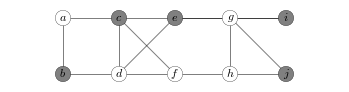

In [35]:
import random

def get_rd_partition(G, parts):
    node_list = G.nodes()
    random.shuffle(node_list)
    def chunks(l, n):
        for i in xrange(0, len(l), n):
            yield l[i:i+n]
    random_partition_list = list(chunks(node_list, len(node_list)/parts))
    return random_partition_list
    
random_partition_list = get_rd_partition(G, parts)
display_graph(G, random_partition_list, pos)

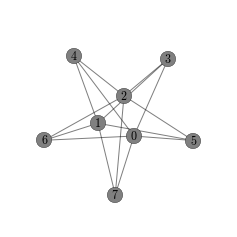

In [55]:
cbg = nx.complete_bipartite_graph(3,5)
display_graph(cbg)

In [42]:
G = nx.Graph()
G.add_nodes_from('abcdefghij')
G.add_edges_from([['a', 'b'], ['a', 'c'], ['b', 'd'], ['c', 'd'], ['c', 'e'], ['c', 'f'], ['d', 'e'], ['d', 'f'], 
                 ['e', 'g'], ['e', 'i'], ['f', 'h'], ['g', 'h'], ['g', 'i'], ['g', 'j'], ['h', 'j']])
pos = {
    'a':(0,1),
    'b':(0,0),
    'c':(1,1),
    'd':(1,0),
    'e':(2,1),
    'f':(2,0),
    'g':(3,1),
    'h':(3,0),
    'i':(4,1),
    'j':(4,0)
}

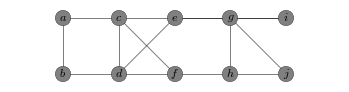

In [47]:
display_graph(G, None, pos)

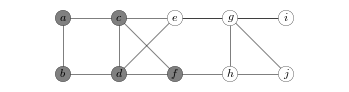

In [50]:
metis_partition_list =  get_metis_partition(G, parts)
display_graph(G, partition_list, pos)

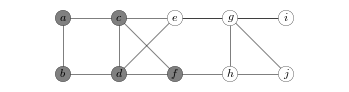

In [49]:
cd_partition_list = get_cd_partition(G)
display_graph(G, cd_partition_list, pos)

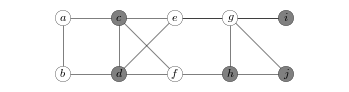

In [51]:
rd_partition_list = get_rd_partition(G, parts)
display_graph(G, rd_partition_list, pos)